In [1]:
# % Fig 4: selection of the best single model
# % 	- A: model performances
# % 	- B: model timing
# % 	- C: time vs performance distribution + actual docking time cutoff

In [245]:
import numpy as np
import pandas as pd
import dask.dataframe as dd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from tqdm.notebook import tqdm

In [255]:
%%time

datasets = {
    'AmpC':'../data/AmpC_screen_table_1M/result_single_Morgan_size=2048_radius=2.csv',
    'D4'  :'../data/D4_screen_table_1M/result_single_Morgan_size=2048_radius=2.csv'
           }

dfs = []
for name, path in tqdm(datasets.items()):
    df = pd.read_csv(path)
    df['proj'] = name
    dfs.append(df)

raw_data = pd.concat(dfs)

  0%|          | 0/2 [00:00<?, ?it/s]

CPU times: user 31.1 ms, sys: 501 µs, total: 31.6 ms
Wall time: 27.9 ms


In [256]:
print(raw_data.shape)
raw_data.sample(n=15)

(2193, 17)


,Unnamed: 0,model,type,top_threshold,train_size,accuracy_score,precision_score,recall_score,TP+FP,docked,time_sec,fingerprints,TP,TN,FP,FN,proj
570,170,RidgeCV,regressor,Hit(top 5.0%),320000,0.943875,0.438250,0.438689,4000,324000,193,Morgan,1753,73757,2247,2243,AmpC
386,12,RidgeCV,regressor,Hit(top 5.0%),320000,0.931763,0.317500,0.317579,4000,324000,98,Morgan,1270,73271,2730,2729,D4
450,50,LassoCV,regressor,Hit(top 5.0%),80000,0.944400,0.444000,0.444000,1000,81000,359,Morgan,444,18444,556,556,AmpC
228,228,DecisionTreeClassifier,classifier,Hit(top 2.0%),160000,0.656025,0.707682,0.712262,23796,183796,134,Morgan,16840,9401,6956,6803,D4
196,196,RandomForestClassifier,classifier,Hit(top 1.0%),320000,0.968163,0.844840,0.337600,1405,321405,413,Morgan,1187,76266,218,2329,AmpC
873,473,LassoCV,regressor,Hit(top 1.0%),320000,0.987200,0.360000,0.360000,800,320800,1632,Morgan,288,78688,512,512,AmpC
500,100,LassoCV,regressor,Hit(top 0.5%),160000,0.992100,0.210000,0.210000,200,160200,639,Morgan,42,39642,158,158,AmpC
1019,645,RidgeCV,regressor,Hit(top 0.5%),320000,0.990888,0.087500,0.087719,400,320400,94,Morgan,35,79236,365,364,D4
665,265,RandomForestRegressor,regressor,Hit(top 5.0%),320000,0.955738,0.557000,0.557418,4000,324000,18064,Morgan,2228,74231,1772,1769,AmpC
180,180,KNeighborsClassifier,classifier,Hit(top 0.5%),320000,0.719313,0.645323,0.472409,20881,340881,82068,Morgan,13475,44070,7406,15049,AmpC


In [264]:
df.sort_values('TP')

,model,model_type,top_threshold,train_size,accuracy_score,precision_score,recall_score,TP+FP,docked,time_sec,fingerprints,TP,TN,FP,FN,proj,ML_gain,log2_time_sec
778,LinearRegression,regressor,1.0,40000,0.990000,0.00000,0.000000,100,40100,6,Morgan,0,9900,100,0,AmpC,7595.114348,2.584963
537,LinearRegression,regressor,1.0,160000,0.990000,0.00000,0.000000,400,160400,15,Morgan,0,39600,400,0,AmpC,12152.182957,3.906891
937,LinearRegression,regressor,1.0,320000,0.990000,0.00000,0.000000,800,320800,32,Morgan,0,79200,800,0,AmpC,11392.671522,5.000000
915,LinearRegression,regressor,1.0,8000,0.990000,0.00000,0.000000,20,8020,3,Morgan,0,1980,20,0,AmpC,3038.045739,1.584963
546,LinearRegression,regressor,1.0,320000,0.990000,0.00000,0.000000,800,320800,41,Morgan,0,79200,800,0,AmpC,8891.841188,5.357552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,RidgeCV,regressor,1.0,320000,0.987650,0.38250,0.382500,800,320800,175,Morgan,306,78706,494,494,AmpC,2281.943583,7.451211
619,RandomForestRegressor,regressor,1.0,320000,0.988762,0.43750,0.438048,800,320800,17790,Morgan,350,78751,450,449,AmpC,22.728522,14.118779
1044,RandomForestRegressor,regressor,1.0,320000,0.988750,0.43750,0.437500,800,320800,18552,Morgan,350,78750,450,450,AmpC,21.794976,14.179287
832,RandomForestRegressor,regressor,1.0,320000,0.989237,0.46125,0.461827,800,320800,19591,Morgan,369,78770,431,430,AmpC,20.749304,14.257903


In [281]:
def threshold2int(s: str) -> int:
    return float(s.replace('%',' ').split()[1])

def threshold_to_int(df: pd.DataFrame) -> pd.DataFrame:
    df['top_threshold'] = df.apply(
        {'top_threshold':threshold2int}
    )
    return df


def add_ratio(df: pd.DataFrame) -> pd.DataFrame:
    # D4 from "Ultra-large for discovering chemotypes"
    # around 1s per ligand
    sec_per_ligand = 43_563*60*60 / 138_000_000 
    
    top_percentage = df.top_threshold / 100.
    
    time_spent_for_ML = df.docked*sec_per_ligand + df.time_sec
    ligands_docked_if_we_did_docking = (time_spent_for_ML / time_in_seconds_per_ligand)
    ligands_gained_with_ML = df.docked*top_percentage + df.TP
    ligands_gained_with_docking = ligands_docked_if_we_did_docking*top_percentage
    
    df['ML_gain'] = ligands_gained_with_ML / ligands_gained_with_docking
    return df

In [283]:
df = (
    raw_data
    .drop('Unnamed: 0', axis=1)
    .dropna(axis=1)
    .pipe(threshold_to_int)
    .rename({'type':'model_type'}, axis=1)
    .query('model_type == "regressor"')
    .query('top_threshold == 1')
    .pipe(add_ratio)
    .assign(log2_time_sec = lambda df: np.log2(df.time_sec))
#     .groupby(['model','proj','model_type','train_size', 'top_threshold'], as_index=False).agg('median')
)

# Plot ratio

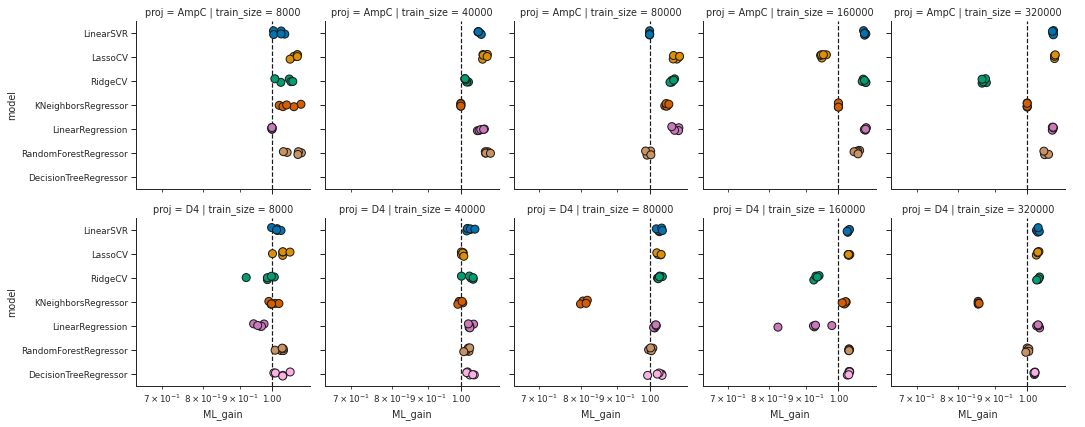

In [306]:
methods_ordered = \
[
    'DecisionTreeRegressor',
    'KNeighborsRegressor',
    'RandomForestRegressor',
    'LassoCV',
    'LinearRegression',
    'LinearSVR',
    'RidgeCV',
    'SVR'
]
palette = sns.color_palette(palette='colorblind',n_colors = df.model.unique().size)
colors = {m:c for m, c in zip(methods_ordered, palette)}

kwa = {
    'y': 'model',
    'x': "ML_gain", 
    'edgecolor':'k',
    'linewidth':1,
    's':8,    
}

grid = sns.FacetGrid(df, col = "train_size", row = "proj")
(grid
 .map_dataframe(sns.stripplot, **kwa, palette='colorblind')
 .set(xscale = 'log')
#  .set(yscale='log')
)

for ax in grid.axes.flat:
    ax.axvline(x=1.0, color='k', linestyle='--')
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#     plt.setp(ax.get_yticklabels(), rotation=90)
    
grid.add_legend()
plt.savefig('../figures/Figure_4_gain.png')
plt.show()

# Plot recall

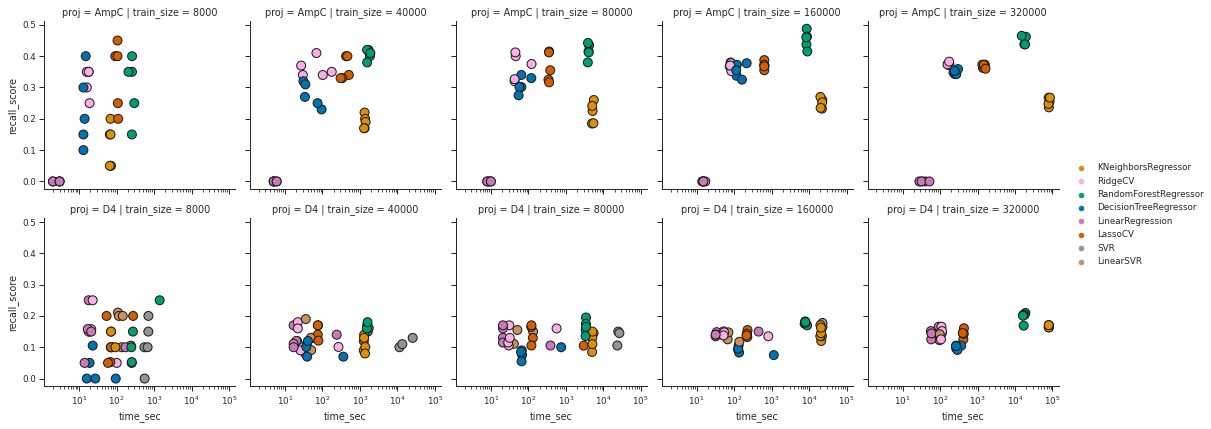

In [224]:
methods_ordered = \
[
    'DecisionTreeRegressor',
    'KNeighborsRegressor',
    'RandomForestRegressor',
    'LassoCV',
    'LinearRegression',
    'LinearSVR',
    'RidgeCV',
    'SVR'
]
palette = sns.color_palette(palette='colorblind',n_colors = df.model.unique().size)
colors = {m:c for m, c in zip(methods_ordered, palette)}

kwa = {
#     'x' : "log2_time_sec", 
    'x': 'time_sec',
    'y': "recall_score", 
    'hue': "model",
    'edgecolor':'k',
    'linewidth':1,
    's':80
    
}

grid = sns.FacetGrid(df, col = "train_size", row = "proj")
grid.map_dataframe(sns.scatterplot, **kwa, palette=colors).set(xscale = 'log')

grid.add_legend()
plt.savefig('../figures/Figure_4.png')
plt.show()